AndrewNg 机器学习 week2 作业


单变量线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('ex1data1.txt',header = None,names = ['Population','Profit'])
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


原始散点图

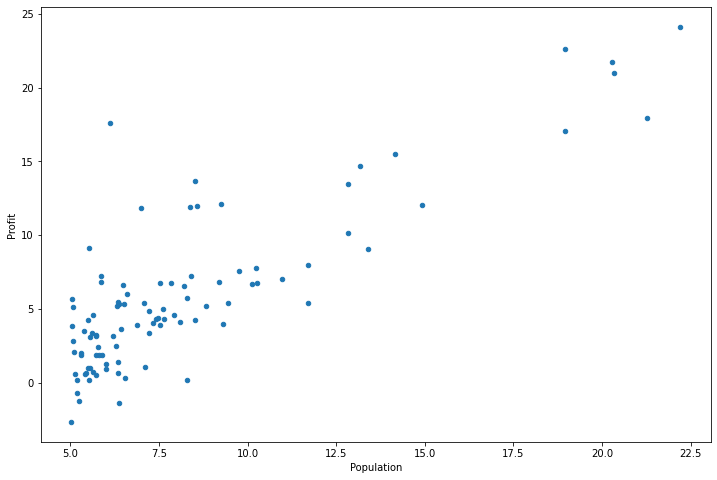

In [3]:
data.plot(kind = 'scatter',x = 'Population',y = 'Profit',figsize = (12,8))
plt.show()

方法1：单变量梯度下降法

In [4]:
#在X中添加一列全1数组
data.insert(0,'ones',1)

In [95]:
#计算代价函数J
def computeCost(X,y,theta):
    a = np.power((X*theta.T-y),2)
    cost = np.sum(a)/(2*len(y))
    return cost

#变量初始化
cols = data.shape[1]
X = data.iloc[:,:-1]# X为data除去最后一列
y = data.iloc[:,cols-1:cols]# y为data的最后一列

#转化X，y由dataframe转化为矩阵，初始化theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

#梯度下降法
def gradientDescent(X,y,theta,alpha,iter):
    m = len(y)
    cost = np.zeros(iter)
    temp = np.matrix(np.zeros(theta.shape))

    for i in range(iter):
        y_predicted = X*theta.T
        temp[0,0] = theta[0,0]-alpha*(1/m)*sum(y_predicted-y)
        temp[0,1] = theta[0,1]-alpha*(1/m)*sum(np.multiply(X[:,1],(y_predicted-y)))
        theta = temp
        cost[i] = computeCost(X, y, theta)
        print(f"theta0 is:{theta[0,0]}")
        print(f"theta1 is:{theta[0,1]}")
        print(f"cost is:{cost[i]}")
    return theta,cost

#训练参数
alpha = 0.01
iter = 10000
theta,cost = gradientDescent(X,y,theta,alpha,iter) 





theta0 is:0.0583913505154639
theta1 is:0.6532884974555674
cost is:6.737190464870004
theta0 is:0.0628917527103938
theta1 is:0.7700097825599365
cost is:5.9315935686049555
theta0 is:0.05782292746142808
theta1 is:0.7913481156584673
cost is:5.901154707081388
theta0 is:0.0510636251607781
theta1 is:0.795729810284954
cost is:5.895228586444221
theta0 is:0.044014378365002556
theta1 is:0.7970961782721866
cost is:5.8900949431173295
theta0 is:0.036924131142162565
theta1 is:0.7979254732843951
cost is:5.885004158443647
theta0 is:0.029837117577144787
theta1 is:0.7986582394519285
cost is:5.879932480491418
theta0 is:0.022761181894038793
theta1 is:0.7993727912003019
cost is:5.874879094762575
theta0 is:0.01569769957420009
theta1 is:0.8000830518518655
cost is:5.869843911806385
theta0 is:0.008646896228913487
theta1 is:0.8007914983590768
cost is:5.8648268653129305
theta0 is:0.0016087930989843163
theta1 is:0.8014985729280016
cost is:5.8598278899321805
theta0 is:-0.005416624870320686
theta1 is:0.80220435605832

可视化

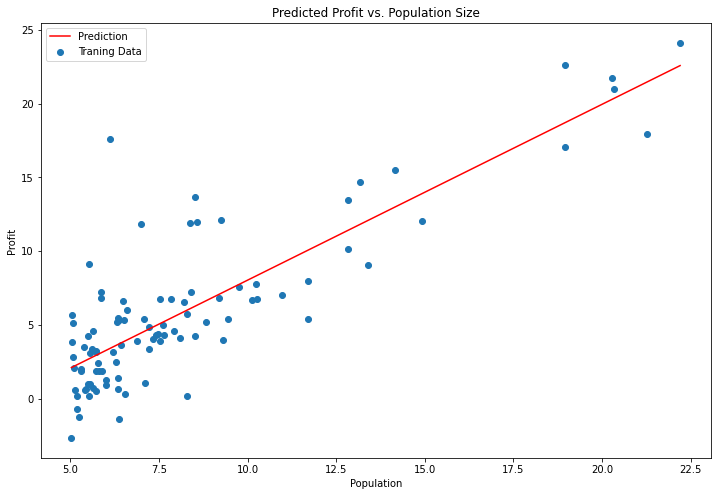

In [85]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

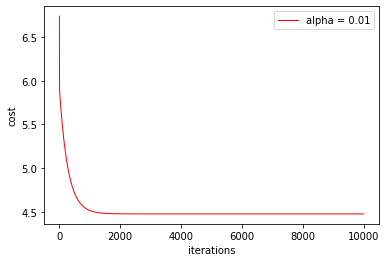

In [97]:
plt.plot(cost,'r',linewidth = 1,label = 'alpha = 0.01')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.legend()

方法二：正规方程组

In [81]:
def normal_equation(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    #X.T@X等价于X.T.dot(X)
    return theta    

normal_equation(X,y)

matrix([[-3.89578088],
        [ 1.19303364]])

方法三：Sickit-learn

In [82]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(data[['Population']],data.Profit)

print(reg.coef_) #斜率
print(reg.intercept_) #截距

[1.19303364]
-3.895780878311852
